## MAJOR PROJECT 

### Women's Clothing E-Commerce Review

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

max_ = 100

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df_1=pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv",index_col=False)
column=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND'
                ,'Positive Feedback Count','Division Name','Department Name','Class Name']

#### Analysing the dataset

In [3]:
df=pd.DataFrame(data=df_1,columns=column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [4]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [5]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
df=df.dropna(axis=0,how='any')

### Data Visualisation 

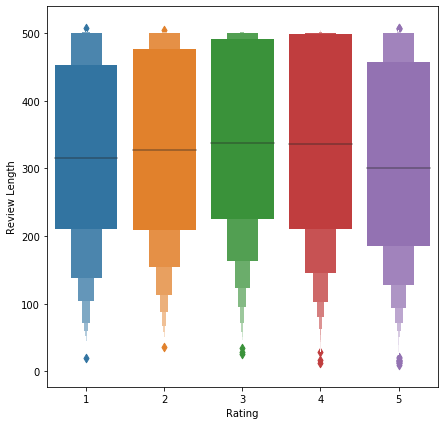

In [7]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

#to find the correlation between review length and rating

plt.figure(figsize=(7,7))
sns.boxenplot(x='Rating', y='Review Length', data=df)


#### From the above visualisation, we can conclude that the review lengths of reviews 3 and 4 are high and tends to increase with the rating.

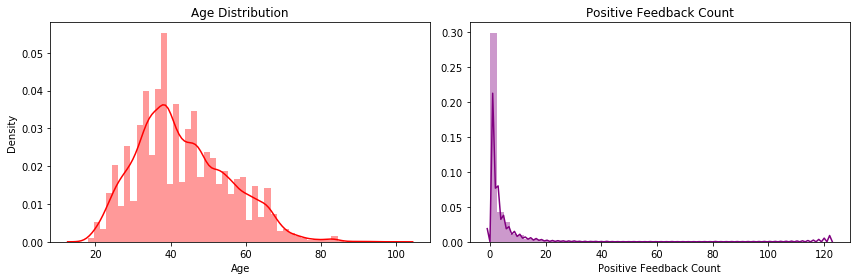

In [8]:
f, ax = plt.subplots(1,2,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0],color="red")
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(df["Positive Feedback Count"], ax=ax[1],color="purple")
ax[1].set_title("Positive Feedback Count")

plt.tight_layout()
plt.show()

#### By observing the graph of Age distribution, we can conclude that the age group within 30-50 are more prominant in positive review

### Word Cloud

In [9]:
#data cleaning

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

import nltk

from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

import re

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers -> list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))

stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)

filtered_sentence = []
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# remove words with length less than 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(max_),
                    columns=['Word', 'Frequency'])

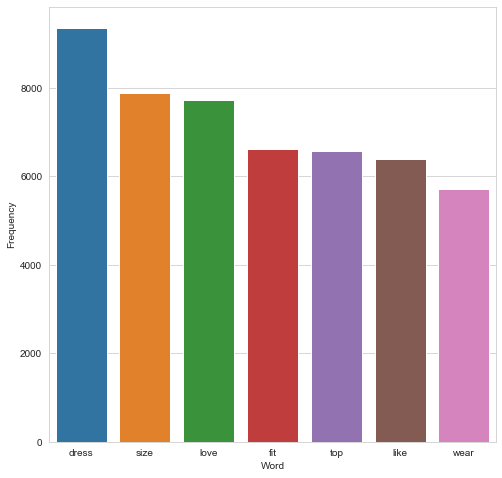

In [10]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

(-0.5, 399.5, 199.5, -0.5)

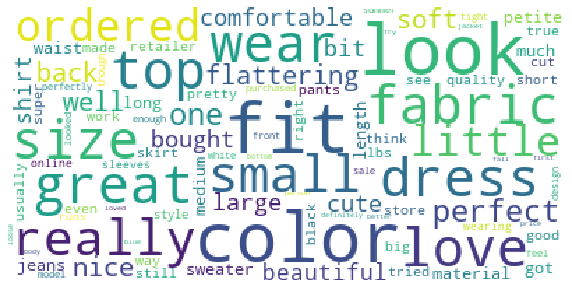

In [11]:
WORD=rslt['Word'].values.tolist()

plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(WORD))
plt.imshow(wc)
plt.axis('off')

### Sentiment Analysis

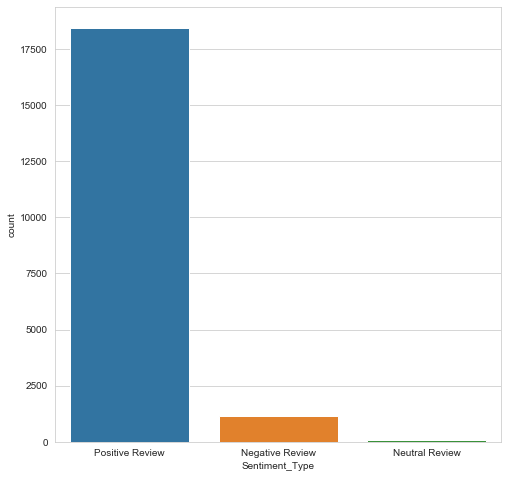

In [12]:
## for Sentiment thing...
# Takes loads of time

from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)

for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def function_for_sentiment_analysis(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(function_for_sentiment_analysis, axis=1)

plt.figure(figsize=(8,8))

ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


In [13]:
positive_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']
neutral_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Neutral Review']

#### Positive Review

(-0.5, 399.5, 199.5, -0.5)

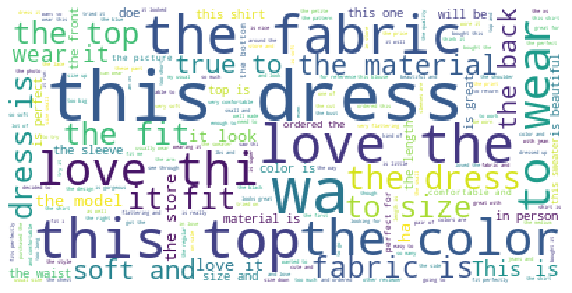

In [14]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(positive_r["Review"]))
plt.imshow(wc)
plt.axis('off')

#### Negative Review

(-0.5, 399.5, 199.5, -0.5)

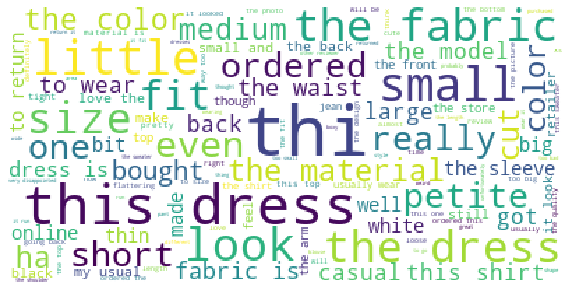

In [15]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(negative_r["Review"]))
plt.imshow(wc)
plt.axis('off')

#### Neutral review

(-0.5, 399.5, 199.5, -0.5)

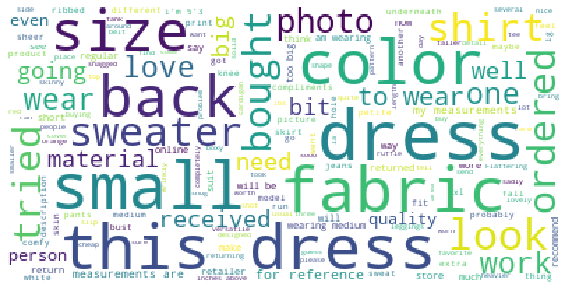

In [16]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(neutral_r["Review"]))
plt.imshow(wc)
plt.axis('off')

In [17]:
len(neutral_r['Review'])

78

### Importing Classifiers

In [18]:
#preprocessing to avoid the error due to limited number of iterations possible
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

#Various models-::
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
nb_clf = MultinomialNB()

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard'
 )

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

### Data Cleaning 

In [19]:
import string

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

def text_processing(cols):
    a = cols

    # removes punctuation,numbers -> list of words
    b = re.sub('[^A-Za-z]+', ' ', a)

    word_tokens = word_tokenize(b)

    filtered_sentence = []
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    #lemmatization and stemming
    filtered_sentence = [porter.stem(w) for w in word_tokens]
    filtered_sentence = [lancaster.stem(w) for w in word_tokens]

    # remove words with length less than 2
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    # remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
    
    a=' '.join(cleaned_data_title)
    
    return a

In [20]:
#text processing for split dataset into train and test.


df['Review Text']=df['Review Text'].apply(text_processing)

#### Creating new class ###

In [21]:
def creating_class(cols):
    rating=cols
    
    if rating <= 3:
        return 'BAD'
    else:
        return 'GOOD'

In [22]:
df['Rating']=df['Rating'].apply(creating_class)

In [23]:
rating_class = df[(df['Rating'] == "BAD") | (df['Rating'] == "GOOD")]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [24]:
#takes a lot of time
from sklearn.feature_extraction.text import CountVectorizer

import string

def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [25]:
print(len(bow_transformer.vocabulary_))

7196


In [26]:
#takes a lot of time
X_review = bow_transformer.transform(X_review)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [28]:
# just for analysis I m considering Naive_Bayes
nb_clf.fit(X_train,y_train)


y_pred=nb_clf.predict(X_test)

print("Naive_bayes", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Naive_bayes 0.8587896253602305
[[ 895  393]
 [ 440 4171]]


              precision    recall  f1-score   support

         BAD       0.67      0.69      0.68      1288
        GOOD       0.91      0.90      0.91      4611

    accuracy                           0.86      5899
   macro avg       0.79      0.80      0.80      5899
weighted avg       0.86      0.86      0.86      5899



#### Verification : Predicting Class ((Good / Bad))

In [29]:
rating_positive=df['Review Text'][101]
print(rating_positive)

rating_positive_transformed = bow_transformer.transform([rating_positive])
nb_clf.predict(rating_positive_transformed)[0]

find that thi brand can littl bit the plac with siz had tri thi person may hav bought smal instead despit being bit big stil look gre and hid flaw wel bought anoth shirt from them the seam scoop neck and that shirt was ful inch smal the bust than thi just someth keep mind stil gre shirt lov the neut col


'GOOD'

In [30]:
rating_negative=df['Review Text'][61]
rating_negative

rating_negative_transformed = bow_transformer.transform([rating_negative])
nb_clf.predict(rating_negative_transformed)[0]

'BAD'

#### Prediction on a random review

In [31]:
str1="itchy cut them out then the thread left behind was plasticy and mor itchy how can you I am dissapointed"

rating_transformed = bow_transformer.transform([str1])
nb_clf.predict(rating_transformed)[0]

'BAD'

#### Comparing various models

In [32]:
max_abs_scaler = preprocessing.MaxAbsScaler()

Results={}

for clf in (log_clf, rnd_clf, svm_clf, voting_clf,bag_clf,nb_clf):
    try:
        clf.min_abs_scaler.fit(X_train, y_train)
    except:
        clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    Results[clf.__class__.__name__]= accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))

LogisticRegression 0.8664180369554162
[[ 824  464]
 [ 324 4287]]


              precision    recall  f1-score   support

         BAD       0.72      0.64      0.68      1288
        GOOD       0.90      0.93      0.92      4611

    accuracy                           0.87      5899
   macro avg       0.81      0.78      0.80      5899
weighted avg       0.86      0.87      0.86      5899

RandomForestClassifier 0.8369215121206984
[[ 414  874]
 [  88 4523]]


              precision    recall  f1-score   support

         BAD       0.82      0.32      0.46      1288
        GOOD       0.84      0.98      0.90      4611

    accuracy                           0.84      5899
   macro avg       0.83      0.65      0.68      5899
weighted avg       0.84      0.84      0.81      5899

SVC 0.8684522800474657
[[ 742  546]
 [ 230 4381]]


              precision    recall  f1-score   support

         BAD       0.76      0.58      0.66      1288
        GOOD       0.89      0.95      0.92    

#### Results

In [33]:
for i,j in zip(Results.keys(),Results.values()):
    print(i,"      ",j)

LogisticRegression        0.8664180369554162
RandomForestClassifier        0.8369215121206984
SVC        0.8684522800474657
VotingClassifier        0.8686218003051365
BaggingClassifier        0.7972537718257332
MultinomialNB        0.8587896253602305


#### Inferences
By comparing various models and their error metrics we came to a conclusion that Support Vector Machine and Logistic Regression models works best for our data set with an accuracy of approximately 86 percent.